# Country_wide_COVID 19_Datasets 

Content
The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus

Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent.

Acknowledgements
The people at "www.worldometers.info" collecting and maintaining this site really are doing very important work
https://www.worldometers.info/coronavirus/#countries

Data about age structure for every country comes from wikipedia

Inspiration
It's possible to use this dataset for various purposes and analyses
My goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age .(Consider the both files for understanding the scenario.)



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/worldometer_snapshots_April18_to_May18.csv



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/population_structure_by_age_per_contry.csv

In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
worldometer_df=pd.read_csv('worldometer_snapshots_April18_to_May18.csv',parse_dates=['Date'])
worldometer_df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [3]:
population_df=pd.read_csv('population_structure_by_age_per_contry.csv')
population_df.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [4]:
#checking the datatype
worldometer_df.dtypes

Date                   datetime64[ns]
Country                        object
Population                      int64
Total Tests                   float64
Total Cases                   float64
Total Deaths                  float64
Total Recovered               float64
Serious or Critical           float64
Active Cases                  float64
dtype: object

In [5]:
population_df.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [6]:
worldometer_df.shape

(6603, 9)

In [7]:
population_df.shape

(213, 4)

In [8]:
#checking null values
worldometer_df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [9]:
population_df.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [10]:
worldometer_df=worldometer_df.merge(population_df,on='Country')

In [11]:
worldometer_df.shape

(6603, 12)

In [12]:
#checking null values
worldometer_df.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [13]:
worldometer_df['Total Tests'].fillna(worldometer_df['Total Tests'].mean(),inplace=True)
worldometer_df['Total Cases'].fillna(worldometer_df['Total Cases'].mean(),inplace=True)
worldometer_df['Total Deaths'].fillna(worldometer_df['Total Deaths'].mean(),inplace=True)
worldometer_df['Total Recovered'].fillna(worldometer_df['Total Recovered'].mean(),inplace=True)
worldometer_df['Serious or Critical'].fillna(worldometer_df['Serious or Critical'].mean(),inplace=True)
worldometer_df['Active Cases'].fillna((worldometer_df['Total Cases']-worldometer_df['Total Deaths']-worldometer_df['Total Recovered']),inplace=True)
worldometer_df['Fraction age 0-14 years'].fillna(worldometer_df['Fraction age 0-14 years'].mean(),inplace=True)
worldometer_df['Fraction age 15-64 years'].fillna(worldometer_df['Fraction age 15-64 years'].mean(),inplace=True)
worldometer_df['Fraction age 65+ years'].fillna(worldometer_df['Fraction age 65+ years'].mean(),inplace=True)

In [14]:
worldometer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,6603.0,3.637913e+07,1.411537e+08,801.000,867268.000,6.859926e+06,2.546422e+07,1.439324e+09
Total Tests,6603.0,2.167252e+05,6.934856e+05,10.000,4733.000,5.419500e+04,2.167252e+05,1.230074e+07
Total Cases,6603.0,1.692968e+04,8.828521e+04,1.000,80.000,6.320000e+02,5.222500e+03,1.550294e+06
Total Deaths,6603.0,1.416252e+03,5.990992e+03,0.000,8.000,5.500000e+01,1.416252e+03,9.198100e+04
Total Recovered,6603.0,5.855424e+03,2.295552e+04,1.000,29.000,2.530000e+02,1.786500e+03,3.563830e+05
Serious or Critical,6603.0,3.867484e+02,1.309473e+03,1.000,7.000,1.370000e+02,3.867484e+02,1.867100e+04
Active Cases,6603.0,1.012260e+04,6.532952e+04,0.000,27.000,2.840000e+02,2.230500e+03,1.101930e+06
Fraction age 0-14 years,6603.0,2.760977e-01,9.676576e-02,0.115,0.191,2.760977e-01,3.350000e-01,5.020000e-01
Fraction age 15-64 years,6603.0,6.361091e-01,6.032011e-02,0.472,0.607,6.380000e-01,6.670000e-01,8.500000e-01
Fraction age 65+ years,6603.0,8.773068e-02,5.667580e-02,0.011,0.038,8.500000e-02,1.140000e-01,2.700000e-01


In [15]:
worldometer_df['month']=worldometer_df['Date'].dt.month
worldometer_df['year']=worldometer_df['Date'].dt.year
worldometer_df['day']=worldometer_df['Date'].dt.day

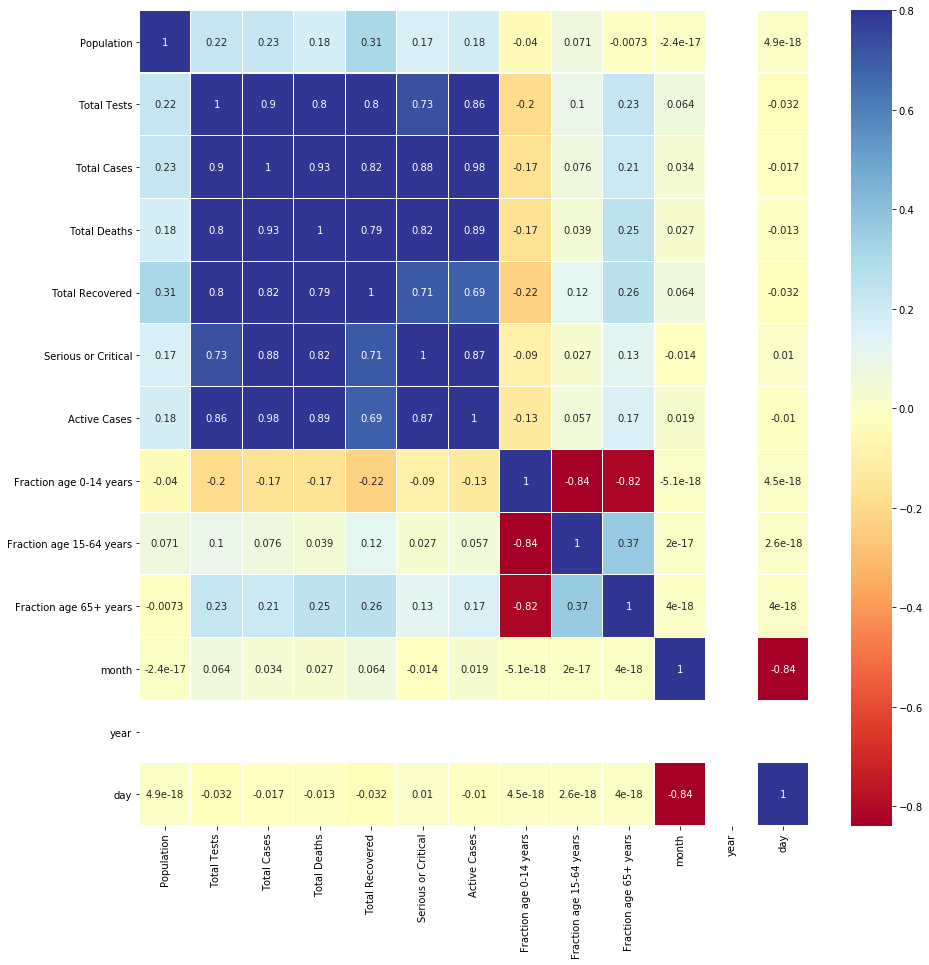

In [16]:
# Correlation Plot
corrmat = worldometer_df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(15, 15))

#Draw the heatmap using seaborn
colormap = plt.cm.RdYlBu
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [17]:
worldometer_df['Country'].unique()

array(['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France',
       'Germany', 'Turkey', 'Iran', 'India', 'Peru', 'China', 'Canada',
       'Saudi Arabia', 'Belgium', 'Mexico', 'Chile', 'Netherlands',
       'Pakistan', 'Qatar', 'Ecuador', 'Switzerland', 'Belarus', 'Sweden',
       'Portugal', 'Singapore', 'Ireland', 'UAE', 'Bangladesh', 'Poland',
       'Ukraine', 'Indonesia', 'Romania', 'Israel', 'South Africa',
       'Japan', 'Colombia', 'Austria', 'Kuwait', 'Egypt',
       'Dominican Republic', 'Philippines', 'S. Korea', 'Denmark',
       'Serbia', 'Panama', 'Czechia', 'Argentina', 'Norway', 'Algeria',
       'Bahrain', 'Afghanistan', 'Australia', 'Morocco', 'Malaysia',
       'Kazakhstan', 'Finland', 'Nigeria', 'Moldova', 'Ghana', 'Oman',
       'Armenia', 'Bolivia', 'Luxembourg', 'Iraq', 'Hungary', 'Cameroon',
       'Azerbaijan', 'Thailand', 'Greece', 'Guinea', 'Uzbekistan',
       'Honduras', 'Sudan', 'Senegal', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'I

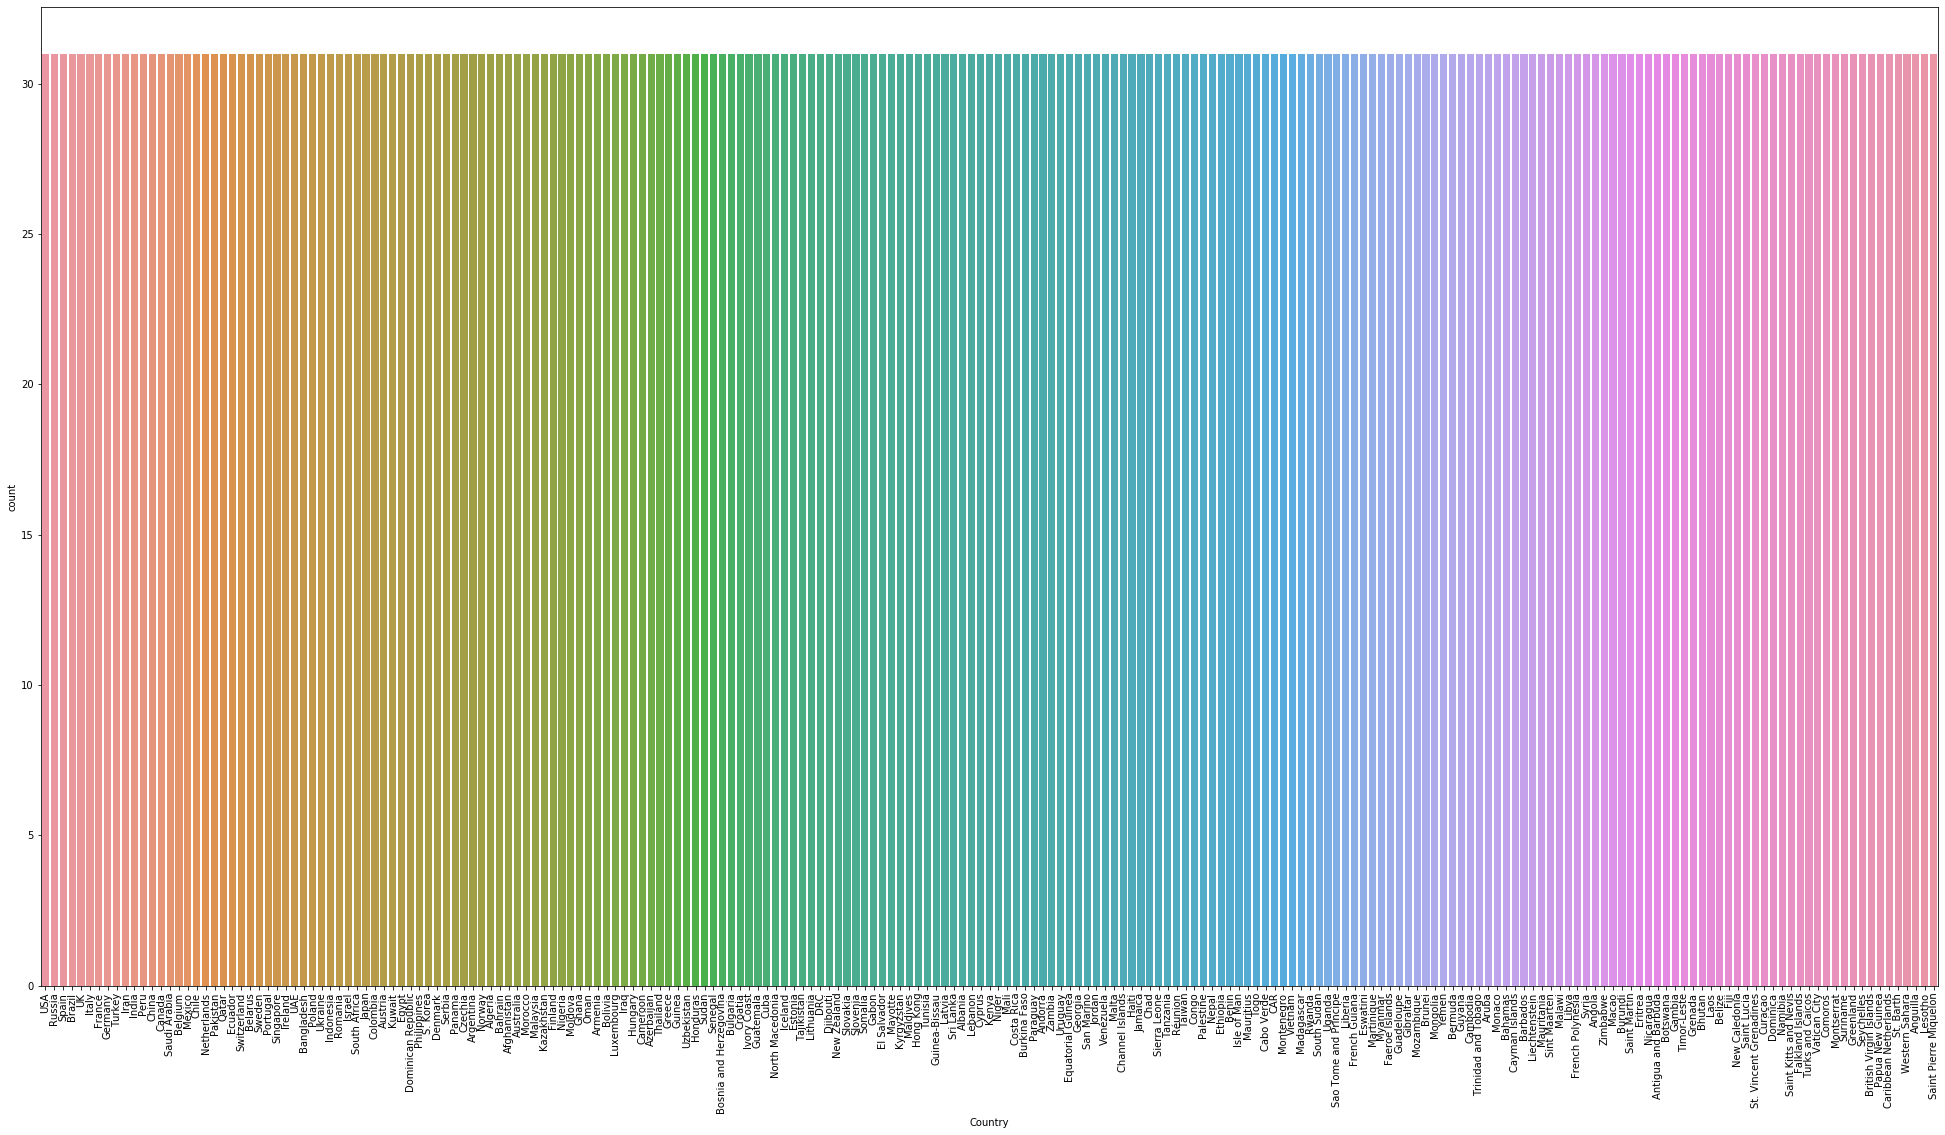

In [18]:
plt.figure(figsize=(34,18))
plt.xticks(rotation=90)
sns.countplot(x='Country', data=worldometer_df)

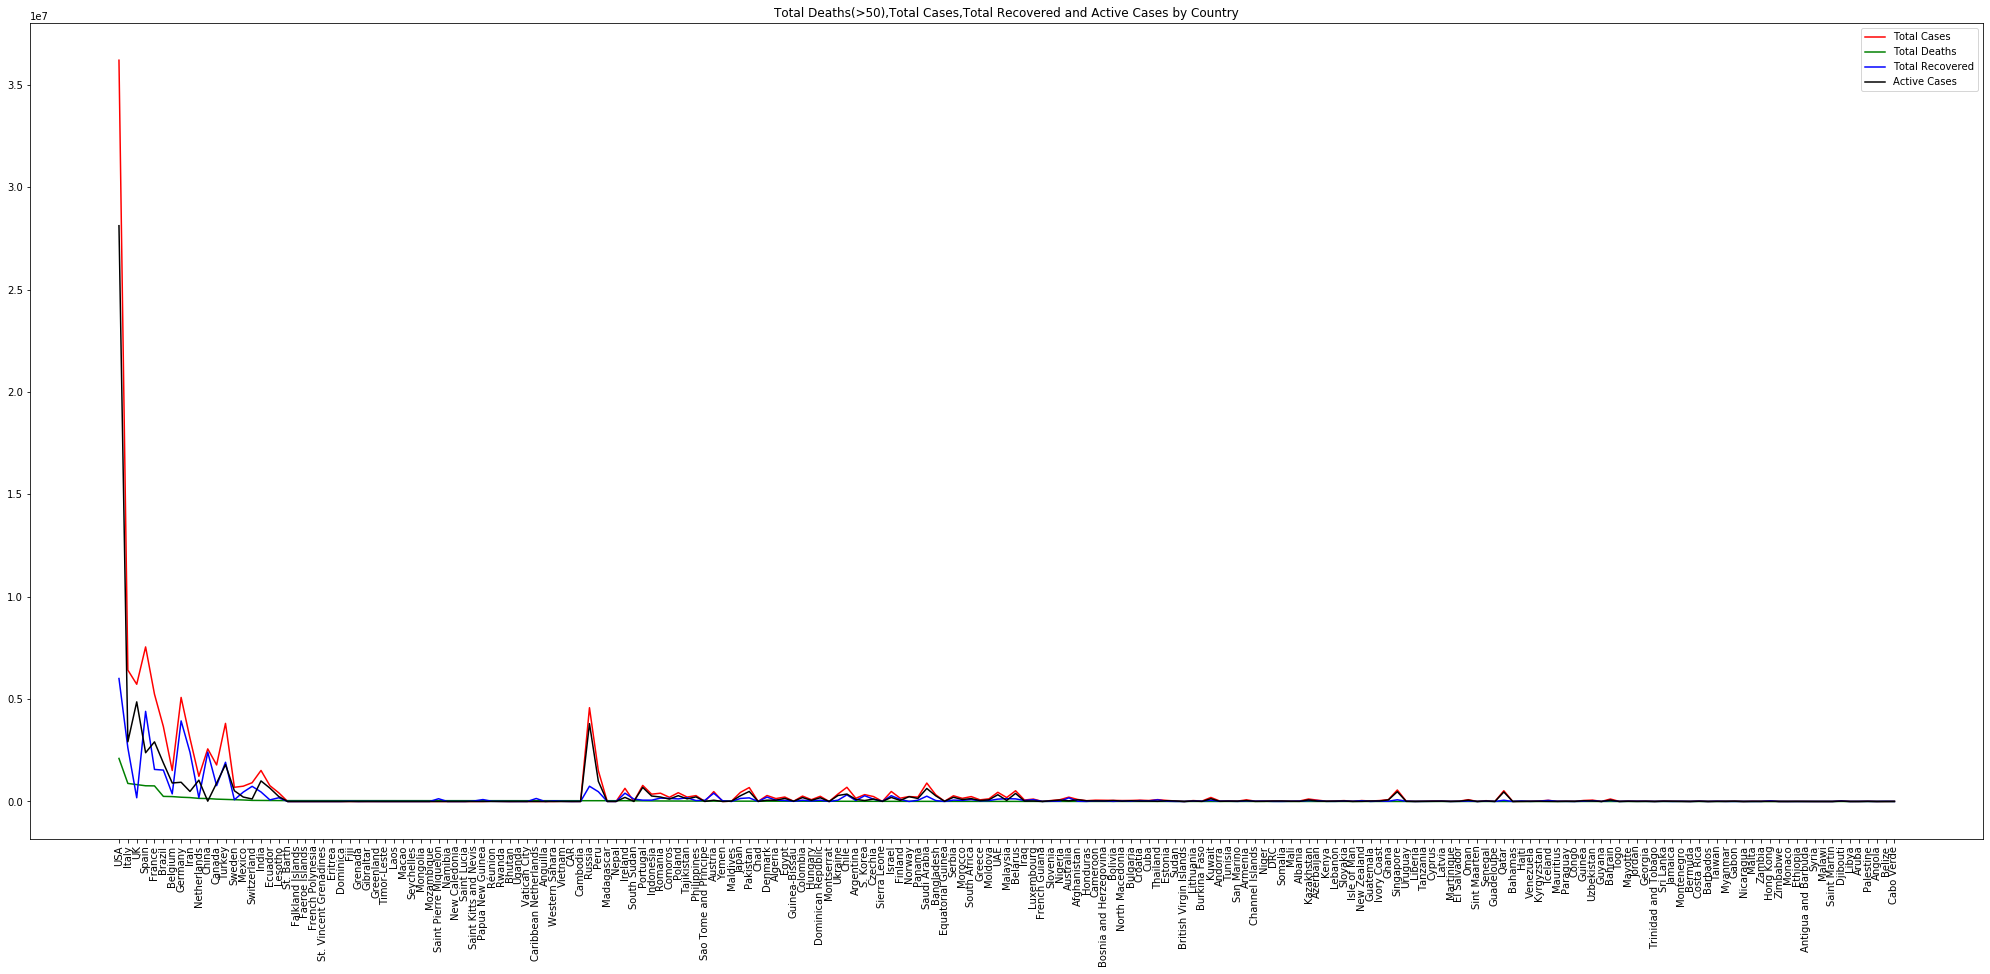

In [19]:
r_data = worldometer_df.groupby(["Country"])["Total Cases", "Total Deaths","Total Recovered","Active Cases"].sum().reset_index()
r_data = r_data.sort_values(by='Total Deaths', ascending=False)
r_data = r_data[r_data['Total Deaths']>50]
plt.figure(figsize=(35,15))
plt.xticks(rotation=90)
plt.plot(r_data['Country'], r_data['Total Cases'],color='red',label="Total Cases")
plt.plot(r_data['Country'], r_data['Total Deaths'],color='green',label="Total Deaths")
plt.plot(r_data['Country'], r_data['Total Recovered'], color='blue',label="Total Recovered")
plt.plot(r_data['Country'], r_data['Active Cases'], color='black',label="Active Cases")
plt.title('Total Deaths(>50),Total Cases,Total Recovered and Active Cases by Country')
leg = plt.legend()
plt.show()

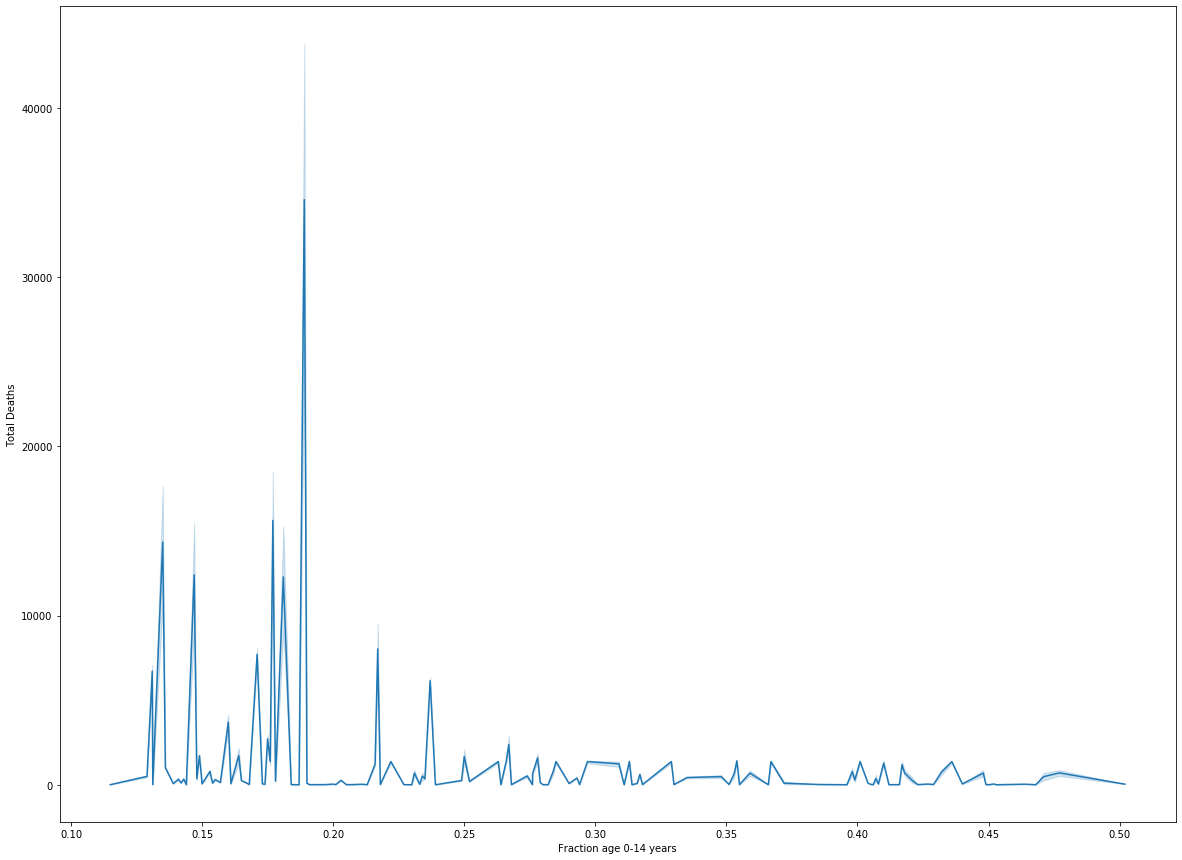

In [20]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 0-14 years'],y=worldometer_df['Total Deaths'],data=worldometer_df)
plt.show()

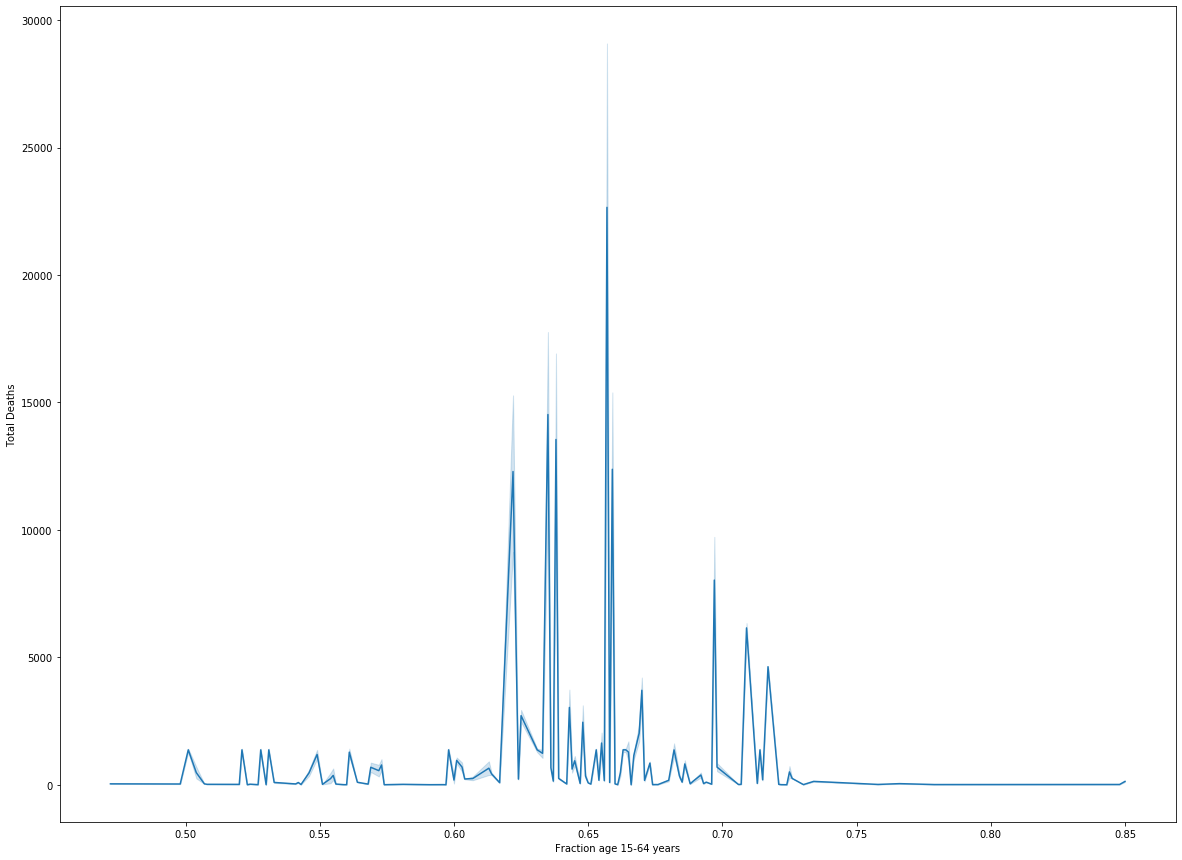

In [21]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 15-64 years'],y=worldometer_df['Total Deaths'],data=worldometer_df)
plt.show()

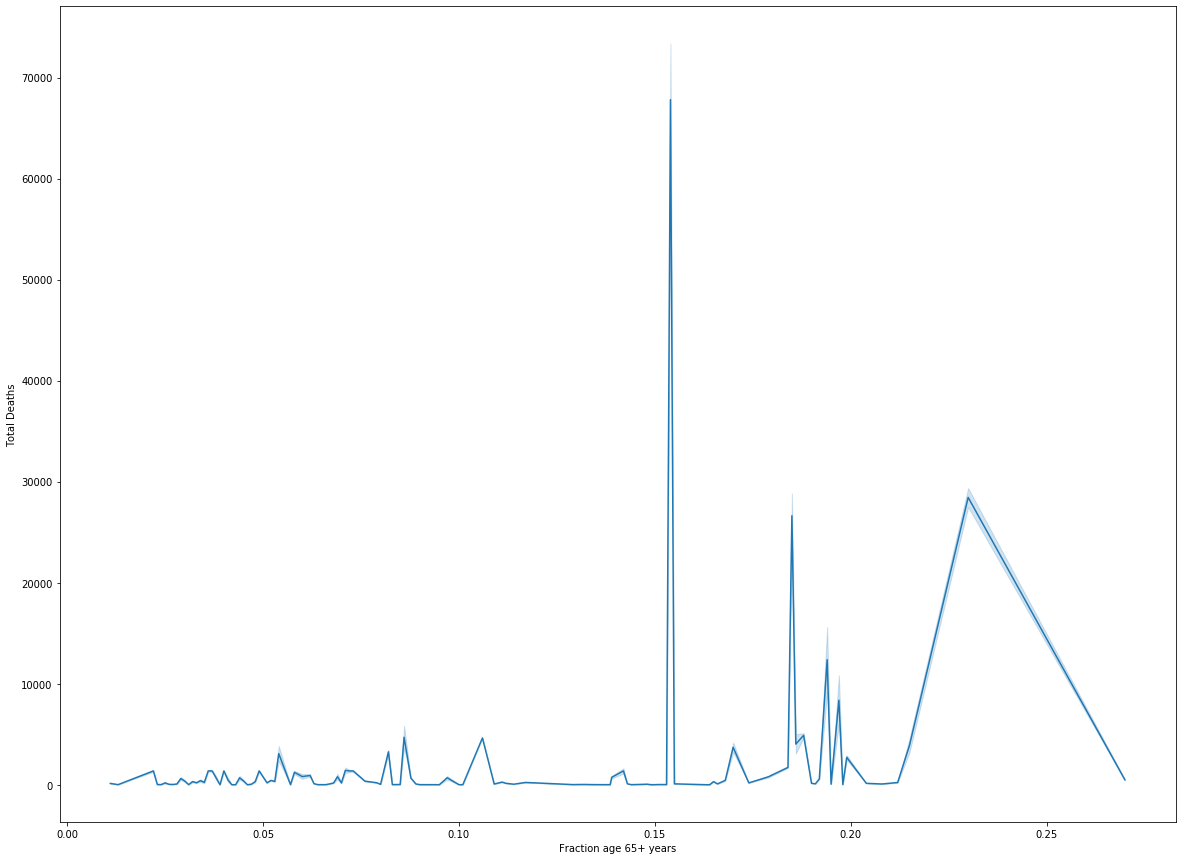

In [22]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 65+ years'],y=worldometer_df['Total Deaths'],data=worldometer_df)
plt.show()

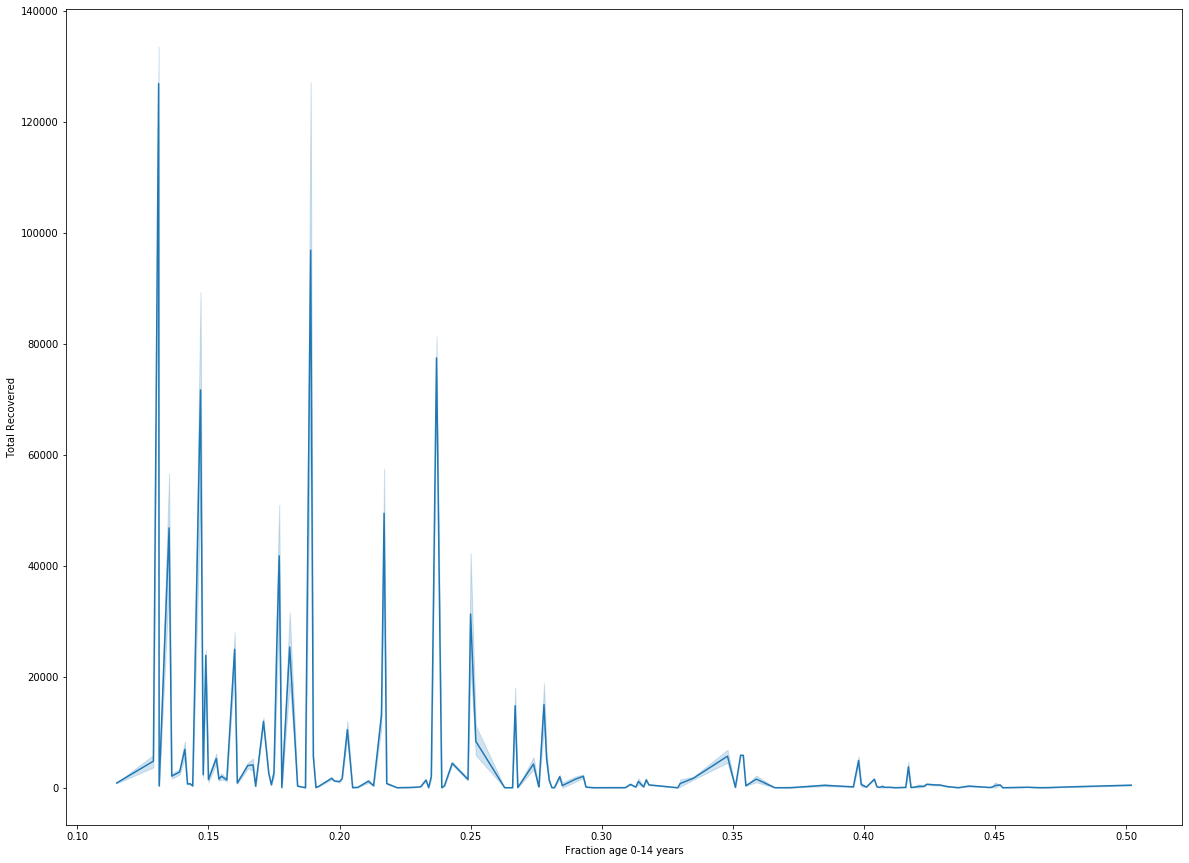

In [23]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 0-14 years'],y=worldometer_df['Total Recovered'],data=worldometer_df)
plt.show()

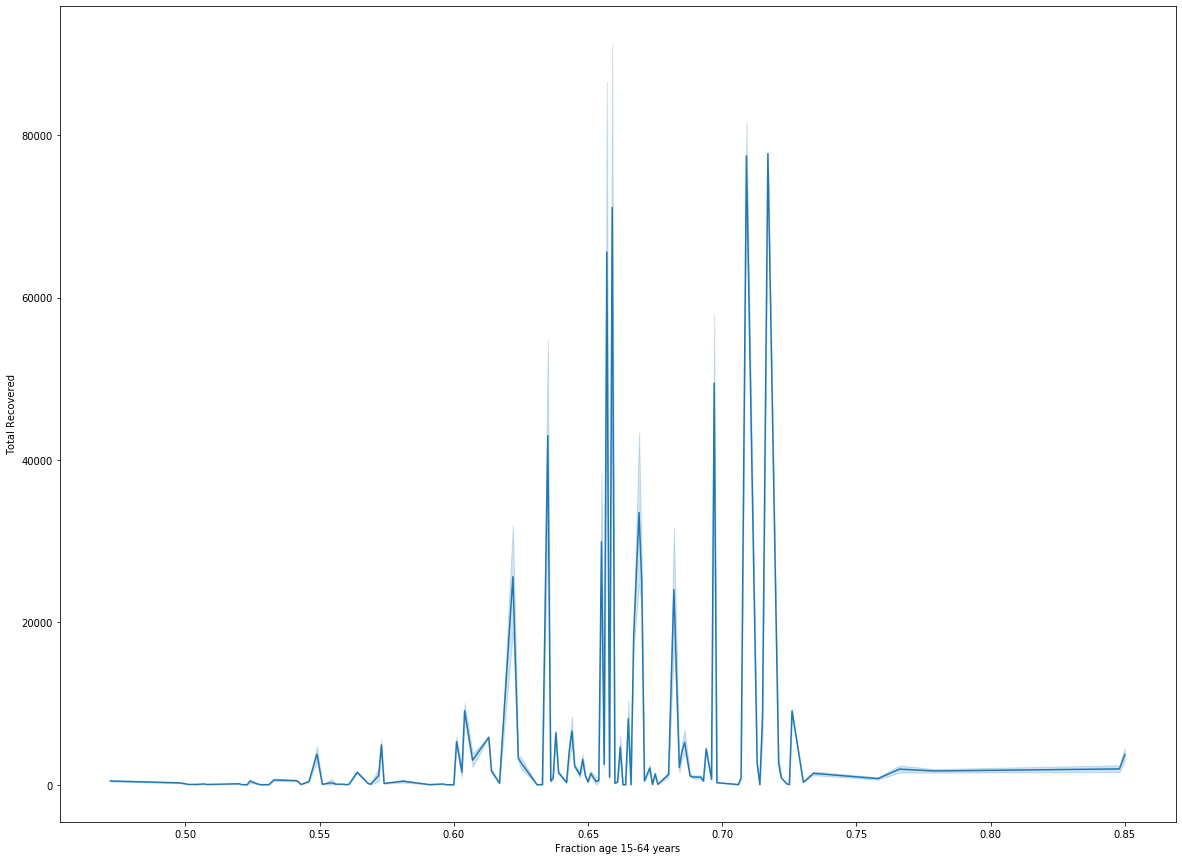

In [24]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 15-64 years'],y=worldometer_df['Total Recovered'],data=worldometer_df)
plt.show()

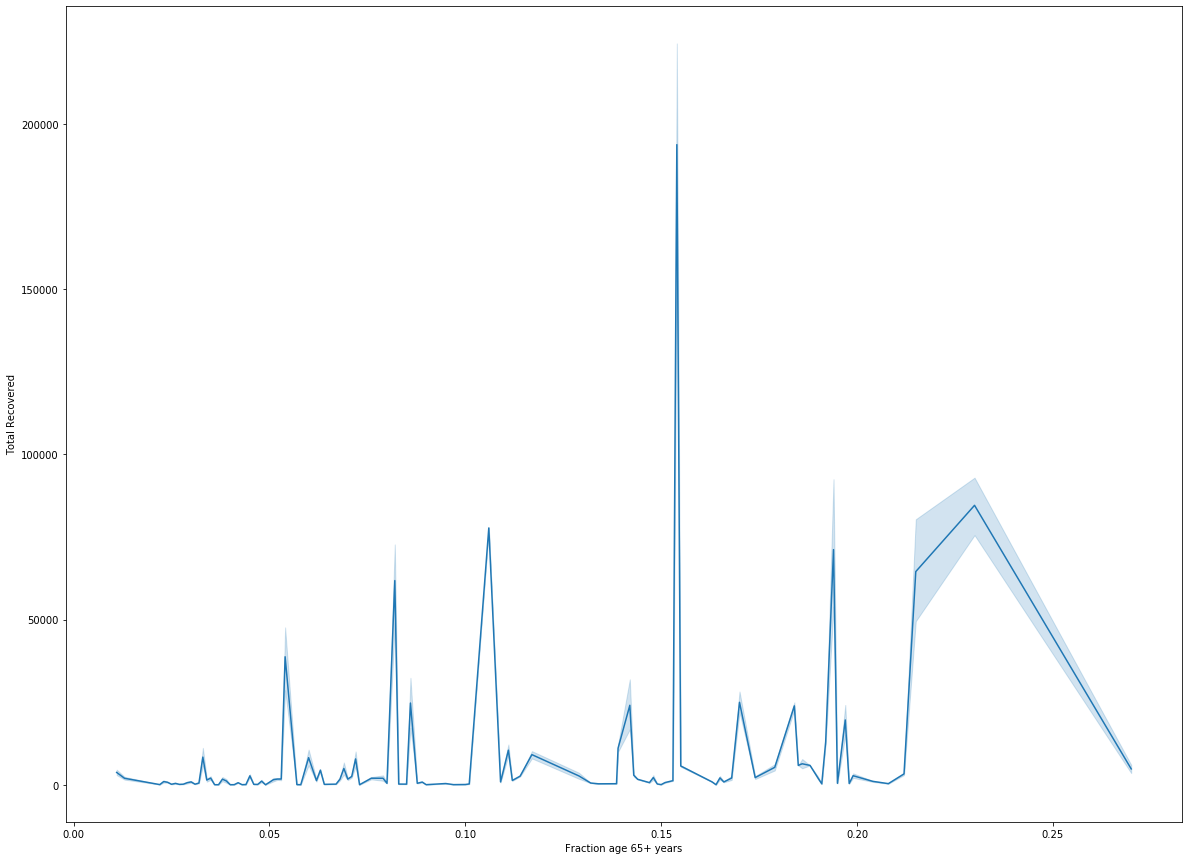

In [25]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 65+ years'],y=worldometer_df['Total Recovered'],data=worldometer_df)
plt.show()

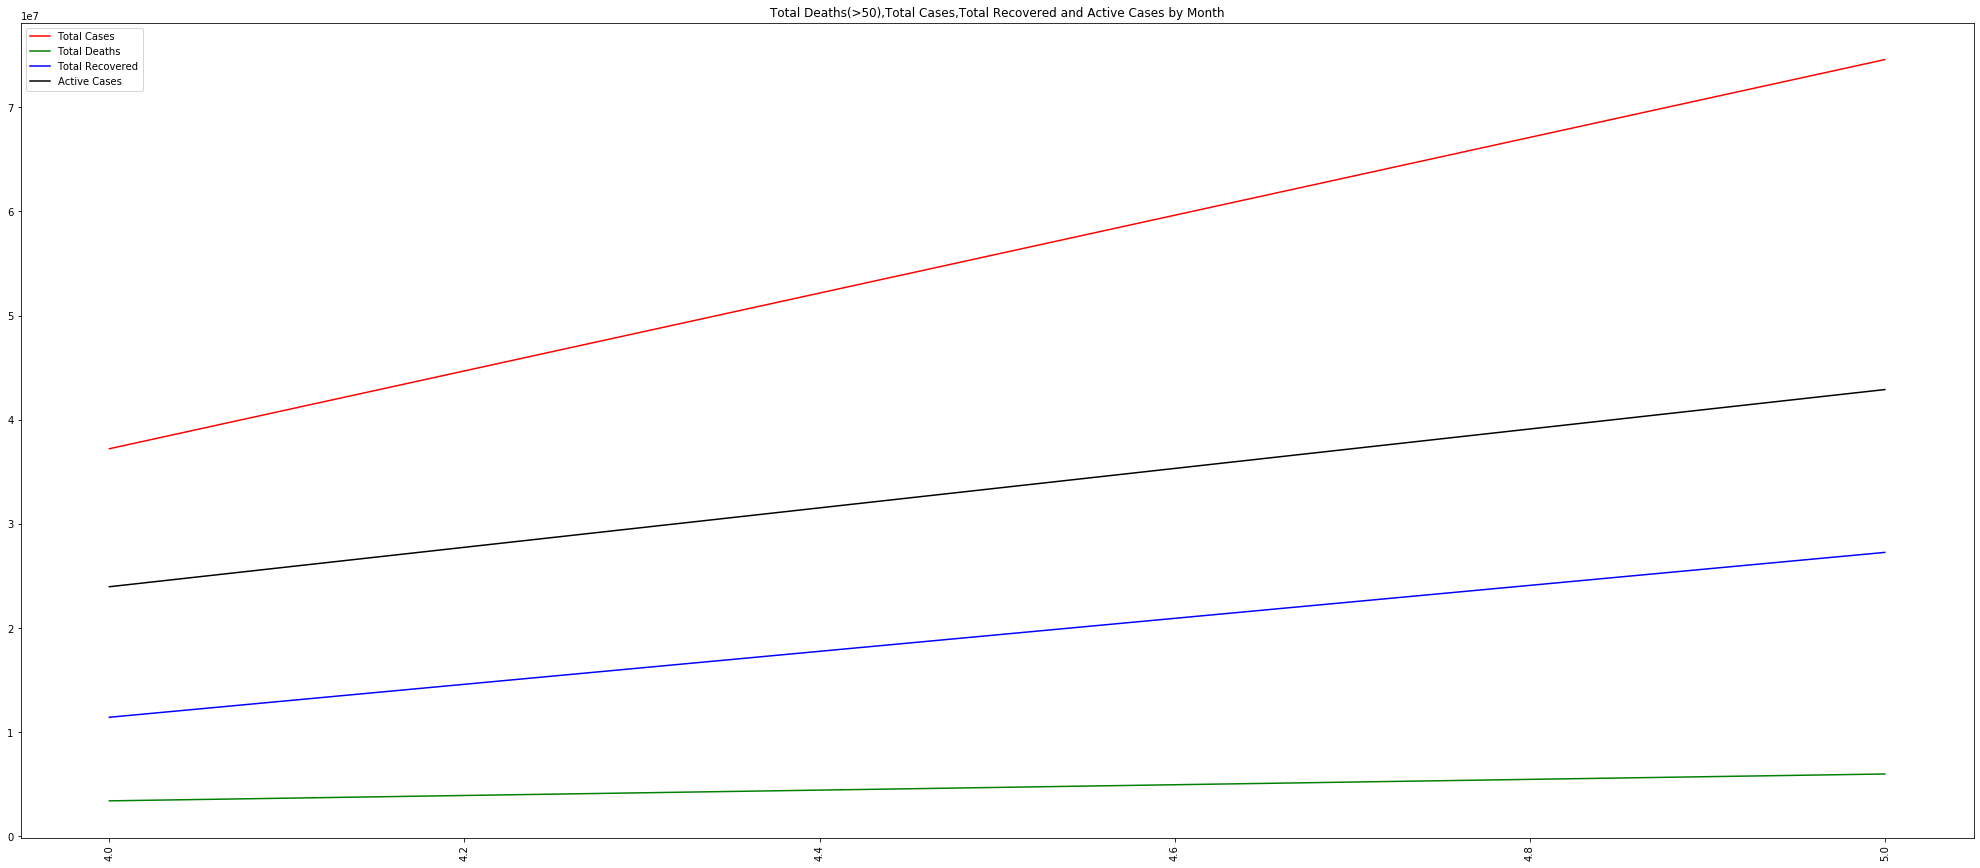

In [26]:
r_data = worldometer_df.groupby(["month"])["Total Cases", "Total Deaths","Total Recovered","Active Cases"].sum().reset_index()
r_data = r_data.sort_values(by='Total Deaths', ascending=False)
r_data = r_data[r_data['Total Deaths']>50]
plt.figure(figsize=(35,15))
plt.xticks(rotation=90)
plt.plot(r_data['month'], r_data['Total Cases'],color='red',label="Total Cases")
plt.plot(r_data['month'], r_data['Total Deaths'],color='green',label="Total Deaths")
plt.plot(r_data['month'], r_data['Total Recovered'], color='blue',label="Total Recovered")
plt.plot(r_data['month'], r_data['Active Cases'], color='black',label="Active Cases")
plt.title('Total Deaths(>50),Total Cases,Total Recovered and Active Cases by Month')
leg = plt.legend()
plt.show()

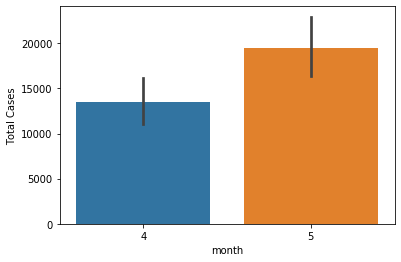

In [27]:
#total case during months of an year
sns.barplot(x='month',y='Total Cases',data=worldometer_df)
plt.show()

In [28]:
worldometer_df.drop('Date',axis=1,inplace=True)

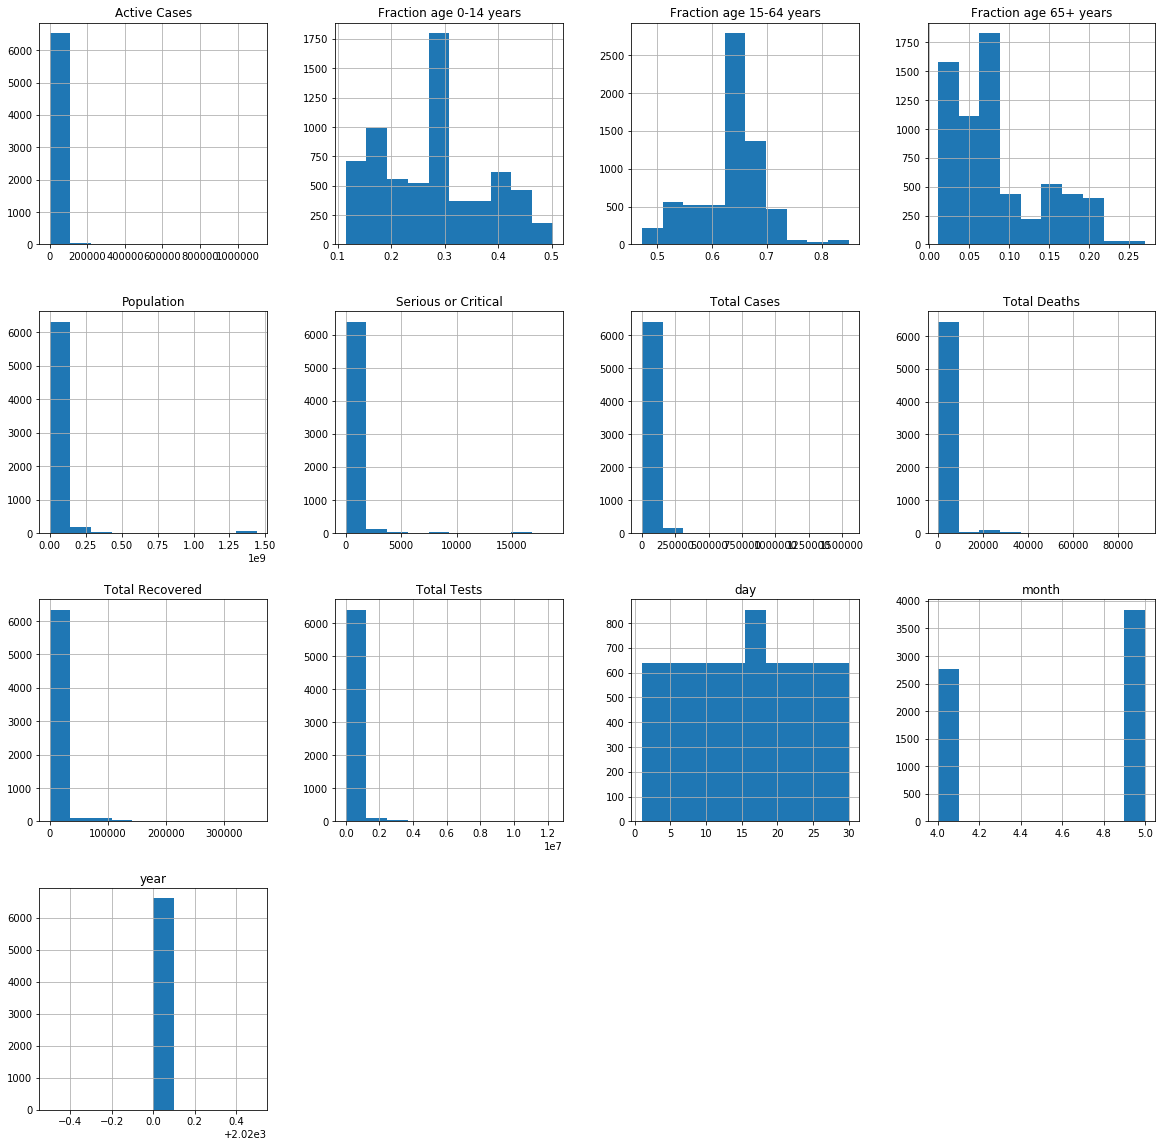

In [29]:
worldometer_df.hist(figsize=(20,20))
plt.show()

In [30]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
worldometer_df['Country']=le.fit_transform(worldometer_df['Country'])

In [31]:
worldometer_df.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,month,year,day
0,201,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,4,2020,18
1,201,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,4,2020,19
2,201,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,4,2020,20
3,201,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,4,2020,21
4,201,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,4,2020,22


In [32]:
y = worldometer_df['Total Deaths']
df_x = worldometer_df.drop('Total Deaths', axis = 1)
print(df_x.shape)
print(y.shape)

(6603, 13)
(6603,)


In [33]:
# scaling down using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [35]:
#lets use linear regression and check max  r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)



max r2 score corresponding to random state: 86 is 0.9716139708308351


In [36]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [37]:
#lets use KNN Regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)



max r2 score corresponding to random state: 81 is 0.8986625584051536


In [38]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  -5.504116120575285
Standard deviation in r2 score for Linear Regression :  4.405592493094057


 Mean r2 score for KNN Regression :  -1.9682839958736154
Standard deviation in r2 score for KNN Regression :  2.30606972326334


In [39]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [40]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)



max r2 score corresponding to random state: 99 is 0.9668804530147164


In [41]:
#lets use cross val score with lasso
print("Mean r2 score for lasso regression : ",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation for lasso ragression : ',cross_val_score(lsreg,x,y,scoring='r2').std())

Mean r2 score for lasso regression :  -5.762665065896504
standard deviation for lasso ragression :  7.802613115522552


In [42]:
#now we will try to use gradient boosting technique
#for getting best set of parameter we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [43]:
#now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
print('Mean r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for gradient boosting Regrssion :  -0.15918644129678955
Standard Deviation r2 score for gradient boosting Regrssion :  0.07836046491490208


In [44]:
#lets check maximum r2_score corresponding to this
r_state=maxr2_score(gbr,x,y)



max r2 score corresponding to random state: 99 is 0.9962293426419335


In [46]:
# we tried all the model and till now GradientBoosting regression is the best
#random state corresponding to highest r2_score is 99


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=73,test_size=0.30)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [47]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  438.5353111302245
r2_score is :  0.9958741827794488


In [48]:
from sklearn.externals import joblib
joblib.dump(gbr,'Deaths_model.pkl')

['Deaths_model.pkl']

In [49]:
model=joblib.load('Deaths_model.pkl')

In [50]:
result=pd.DataFrame(model.predict(x_test))

In [51]:
result.to_csv('covid_Death_prdictresults.csv')